In [4]:
cd src

/Users/annierumbles/Desktop/Coding/galvanize/capstone_work/src


In [62]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import folium 
from sample_site_class import SampleSite
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

In [5]:
ls

__pycache__/          ghostdriver.log       sample_site_class.py
data_cleaning.py      map_plotting.py


In [6]:
df = pd.read_csv('/Users/annierumbles/Desktop/Coding/galvanize/capstone_work/data/latest_knb-lter-nwt.96.16/snowateq.mw.data.16.csv')

In [7]:
df_swe = pd.read_csv('/Users/annierumbles/Desktop/Coding/galvanize/capstone_work/data/latest_knb-lter-nwt.96.16/snowateq.mw.data.16.csv')
df_swe['date'] = pd.to_datetime(df_swe['date'])
df_swe.dropna(axis=0, how='all', inplace=False)
df_swe.dropna(axis=0, how='any', subset=['swe'], inplace=True)
df_swe.sort_values(['date', 'local_site'], inplace=True)
df_swe.reset_index(drop=True, inplace=True)
df_swe.head(20)

,LTER_site,local_site,samp_loc,loc_code,date,prof_depth,mass,wted_temp,density,swe
0,NWT,SADDLE,SDL.008,008,1993-02-26,0.73,223.810000,-8.356164,306.589041,0.223810
1,NWT,SADDLE,SDL.028,028,1993-02-26,0.38,100.840000,-7.684211,265.368421,0.100840
2,NWT,SADDLE,SDL.058,058,1993-02-26,0.59,181.060000,-7.305085,306.881356,0.181060
3,NWT,SADDLE,SDL.007,007,1993-03-04,0.49,182.040000,-5.489796,371.510204,0.182040
4,NWT,SADDLE,SDL.028,028,1993-03-04,0.30,101.700000,-6.333333,339.000000,0.101700
5,NWT,SADDLE,SDL.035,035,1993-03-04,2.15,808.700000,-4.813953,376.139535,0.808700
6,NWT,SADDLE,SDL.016,016,1993-03-11,1.35,477.791667,-4.296296,353.919753,0.477792
7,NWT,SADDLE,SDL.037,037,1993-03-11,0.86,286.200000,-3.697674,332.790698,0.286200
8,NWT,SADDLE,SDL.016,016,1993-03-18,1.49,591.540000,-3.711409,397.006711,0.591540
9,NWT,SADDLE,SDL.016,016,1993-04-01,1.70,644.500000,-2.764706,379.117647,0.644500


In [8]:
names = list(df_swe['local_site'].unique())
# lowered = [n.lower() for n in names]
objs = [SampleSite(i, df_swe) for i in names]

saddle =objs[0] 
gl4 = objs[1] 
gl5 = objs[2] 
navajo = objs[3] 
martinelli = objs[4] 
arikaree = objs[5] 
subnivean = objs[6] 
albion = objs[7] 
gl3 = objs[8] 
tower_meadow = objs[9] 
tower_tree_hill = objs[10] 
c1 = objs[11] 
soddie = objs[12] 
nan = objs[13]

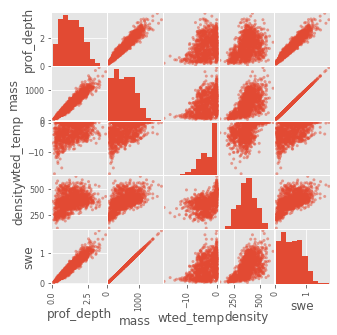

In [9]:
pd.plotting.scatter_matrix(df_swe, figsize=(5,5))
plt.show()

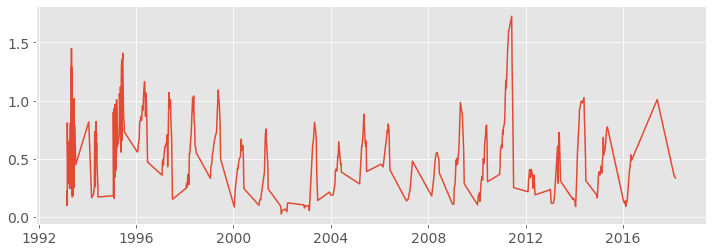

In [12]:
fig, ax = plt.subplots(1, figsize=(12,4))
saddlex = df_swe[df_swe['local_site']=='SADDLE']
sadx = saddlex['date']
sady = saddlex['swe']

ax.plot(sadx, sady)

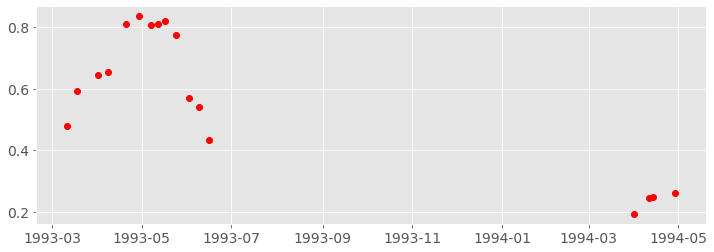

In [13]:
global_x = df_swe['date']
saddley = saddle.df['swe']
saddlex = saddle.df['date']
codes = [x for x in saddle.local_site_codes]
x = saddlex[saddle.df['loc_code']==codes[5]]
y = saddley[saddle.df['loc_code']==codes[5]]
fig, ax = plt.subplots(1, figsize=(12,4))

ax.plot(x, y, 'ro')

In [14]:
names = list(df_swe['local_site'].unique())
names.pop(-1)
names = [x.lower().replace(' ', '_') for x in names]
global_x = np.arange(0, len(df_swe['date']), 1)
objects = [saddle, gl4, gl5, navajo, martinelli, arikaree, subnivean, albion, gl3, tower_meadow, tower_tree_hill, c1, soddie]
type(objects[4])
names

['saddle',
 'gl4',
 'gl5',
 'navajo',
 'martinelli',
 'arikaree',
 'subnivean',
 'albion',
 'gl3',
 'tower_meadow',
 'tower_tree_well',
 'c1',
 'soddie']

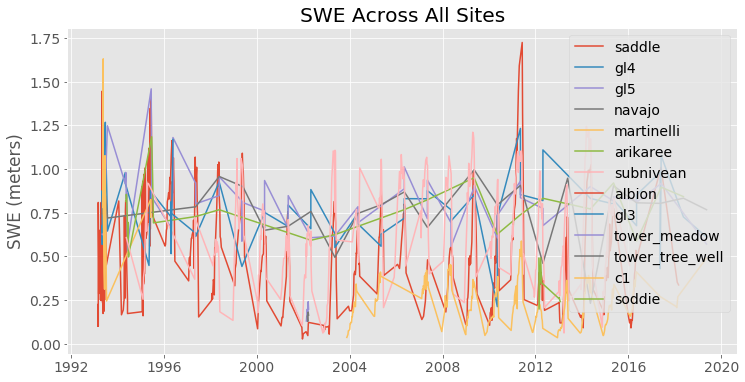

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('SWE Across All Sites')
ax.set_ylabel('SWE (meters)')

for i in range(0, len(objects)):
    x = objects[i].df['date']
    y = objects[i].df['swe']
    ax.plot(x,y,label=names[i])
    
ax.legend(loc='best')

In [16]:
dates = ['1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
        '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
        '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01','2012-01-01', '2013-01-01', '2014-01-01',
        '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01']
mask = (saddle.df['date'] >= dates[-3]) & (saddle.df['date'] < dates[-2])
new_df = saddle.df[mask]

new_df['swe'].mean()

# fig, ax = plt.subplots(figsize=(12,6))
# ax.set_title('Saddle Yearly Averages')

nan

In [17]:
saddle.df['date'][0].year
years = np.arange(1993, 2021, 1)
saddle_93 = []
saddle_dict = {}
for j in years:
    vals = []
    for i in range(0, len(saddle.df['date'])):
        if saddle.df['date'][i].year == j:
            vals.append(saddle.df['swe'][i])
        saddle_dict[str(j)] = np.mean(vals)
saddle_dict

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'1993': 0.5059607131398013,
 '1994': 0.5088615000000001,
 '1995': 0.8488443443619873,
 '1996': 0.8594474166666666,
 '1997': 0.623349,
 '1998': 0.5703433333333332,
 '1999': 0.7123226666666667,
 '2000': 0.4515547058823529,
 '2001': 0.3315682906574395,
 '2002': 0.0856083909090909,
 '2003': 0.330712619047619,
 '2004': 0.4163552994227994,
 '2005': 0.6322878787878788,
 '2006': 0.6241209090909091,
 '2007': 0.25461,
 '2008': 0.3862375,
 '2009': 0.5031094610667111,
 '2010': 0.4061534375,
 '2011': 0.9710316294881589,
 '2012': 0.3271317699502877,
 '2013': 0.30011323263976714,
 '2014': 0.6030996153846153,
 '2015': 0.517969,
 '2016': 0.2731698611111111,
 '2017': 1.00946666666667,
 '2018': 0.34397133333333296,
 '2019': nan,
 '2020': nan}

Text(0, 0.5, 'Snow Water Equivalent (meters)')

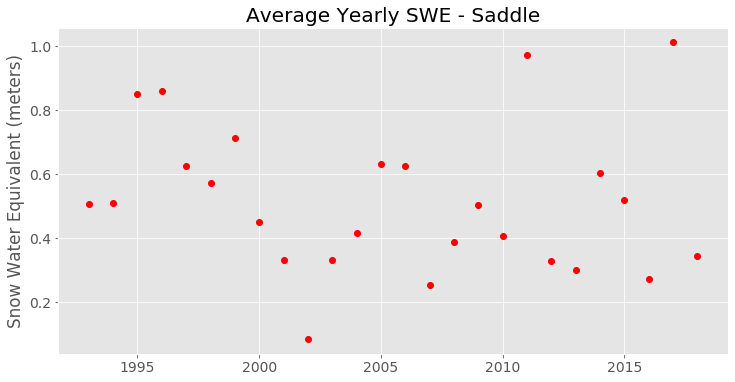

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(1993, 2021, 1)
y = [v for v in saddle_dict.values()]
ax.plot(x, y , 'ro')
ax.set_title('Average Yearly SWE - Saddle')
ax.set_ylabel('Snow Water Equivalent (meters)')

In [19]:
names

['saddle',
 'gl4',
 'gl5',
 'navajo',
 'martinelli',
 'arikaree',
 'subnivean',
 'albion',
 'gl3',
 'tower_meadow',
 'tower_tree_well',
 'c1',
 'soddie']

In [20]:
saddle.df.tail()

,LTER_site,local_site,samp_loc,loc_code,date,prof_depth,mass,wted_temp,density,swe
407,NWT,SADDLE,SDL.006,006,2016-04-29,1.44,534.065000,-1.850694,370.878472,0.534065
408,NWT,SADDLE,SDL.006,006,2016-05-10,1.35,486.233333,-1.037037,360.172840,0.486233
409,NWT,SADDLE,SDL.006,006,2017-05-30,2.00,1009.466667,-0.008333,504.733333,1.009467
410,NWT,SADDLE,SDL.006,006,2018-02-09,0.71,351.598333,-7.098592,495.208920,0.351598
411,NWT,SADDLE,SDL.006,006,2018-03-02,0.68,336.344333,-10.058824,494.624020,0.336344


In [21]:
def get_yearly_means(sample_object):
    dct = {}
    years = np.arange(1993, 2021, 1)
    for i in years:
        vals = []
        for j in range(0, len(sample_object.df['date'])):
            if sample_object.df['date'][j].year == i:
                vals.append(sample_object.df['swe'][j])
            dct[str(i)] = np.mean(vals)
    return dct

In [22]:
saddle_means = get_yearly_means(saddle)
gl4_means = get_yearly_means(gl4)
gl5_means = get_yearly_means(gl5)
navajo_means = get_yearly_means(navajo)
martinelli_means = get_yearly_means(martinelli)
arikaree_means = get_yearly_means(arikaree)
subnivean_means = get_yearly_means(subnivean)
albion_means = get_yearly_means(albion)
gl3_means = get_yearly_means(gl3)
tower_meadow_means = get_yearly_means(tower_meadow)
tower_tree_hill_means = get_yearly_means(tower_tree_hill)
c1_means = get_yearly_means(c1)
soddie_means = get_yearly_means(soddie)

In [23]:
arikaree_means

{'1993': nan,
 '1994': 0.6937660416666667,
 '1995': 0.9490120634920634,
 '1996': nan,
 '1997': 0.72792,
 '1998': 0.767,
 '1999': nan,
 '2000': nan,
 '2001': nan,
 '2002': 0.59209,
 '2003': 0.62439,
 '2004': nan,
 '2005': nan,
 '2006': 0.7675,
 '2007': 0.8241,
 '2008': nan,
 '2009': 0.9501,
 '2010': 0.6268,
 '2011': 0.73854,
 '2012': 0.8324,
 '2013': nan,
 '2014': 0.771216666666667,
 '2015': 0.9203464285714291,
 '2016': 0.5878,
 '2017': 0.8959,
 '2018': 0.8421166666666671,
 '2019': nan,
 '2020': nan}

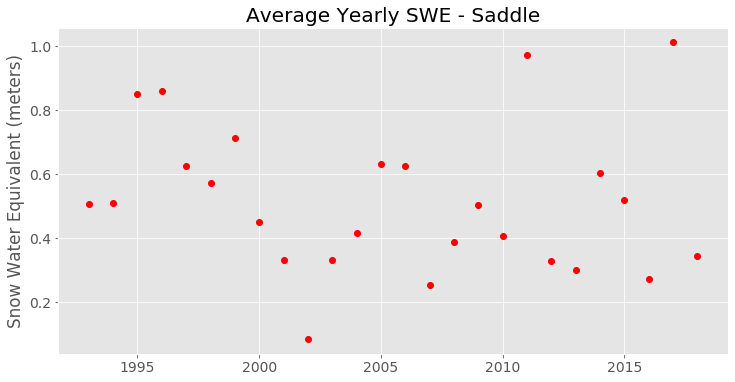

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(1993, 2021, 1)
y = [v for v in saddle_dict.values()]
ax.plot(x, y , 'ro')
ax.set_title('Average Yearly SWE - Saddle')
ax.set_ylabel('Snow Water Equivalent (meters)')
list_of_dicts = [saddle_means, gl4_means, gl5_means, navajo_means, martinelli_means, arikaree_means,
                 subnivean_means, albion_means, gl3_means, tower_meadow_means, tower_tree_hill_means,
                 c1_means, soddie_means]

In [25]:
from cycler import cycler



In [26]:
def plot_yearly_mean_swe(mean_dicts):
    labels = ['Saddle','GL4','GL5','Navajo','Martinelli','Arikaree','Subnivean','Albion','GL3','Tower Meadow',
    'Tower Tree Well','C1','Soddie']
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.set_title('Average Yearly Snow Water Equivalent - All Sites', fontsize=20)
    ax.set_ylabel('SWE (m)', fontsize=15)
    ax.set_prop_cycle('color',['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8', '#92C5DE', '#80CDC1', '#5E3C99', '#E66101', '#F4A582', 'B8E186'])

    for i, dct in enumerate(mean_dicts):
        x = np.arange(1993, 2021, 1)
        y = [v for v in dct.values()]
        ax.plot(x, y, marker='o', mew=1, linewidth=.75, label=labels[i])
    ax.legend(labels, loc='upper right', bbox_to_anchor=(1.16,1), fontsize='small')


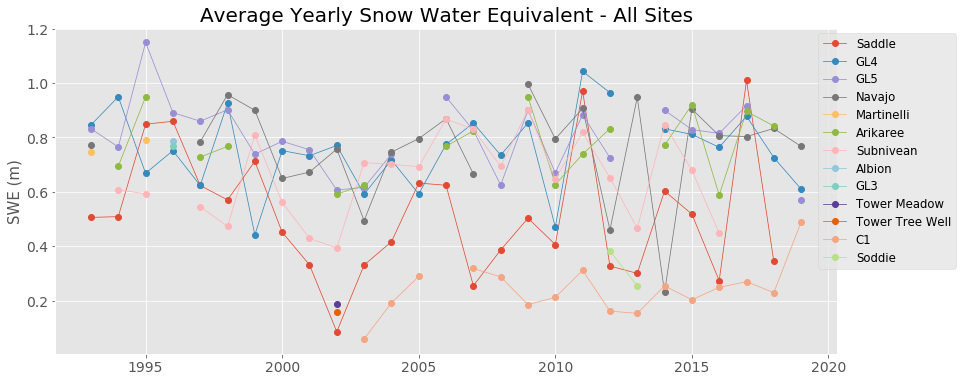

In [27]:
## ****************************************
x = plot_yearly_mean_swe(list_of_dicts)

In [28]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']


In [29]:
def get_yearly_means_of_all_sites(df):
    dct = {}
    years = np.arange(1993, 2021, 1)
    for i in years:
        vals = []
        for j in range(0, len(df['date'])):
            if df['date'][j].year == i:
                vals.append(df['swe'][j])
            dct[str(i)] = np.mean(vals)
    return dct

In [30]:
get_yearly_means_of_all_sites(df_swe)

{'1993': 0.6144932726769495,
 '1994': 0.6207632518796993,
 '1995': 0.8102554226026498,
 '1996': 0.8413858095238096,
 '1997': 0.6441292857142856,
 '1998': 0.5714410256410256,
 '1999': 0.756459333976834,
 '2000': 0.5374192631578947,
 '2001': 0.4251662451953434,
 '2002': 0.3201493783997436,
 '2003': 0.5024086125541125,
 '2004': 0.4014368825757576,
 '2005': 0.5575784641284641,
 '2006': 0.780086099454365,
 '2007': 0.5772680678571429,
 '2008': 0.4609827958152959,
 '2009': 0.57060201391123,
 '2010': 0.44000370476190476,
 '2011': 0.6617347883415196,
 '2012': 0.41894292845249986,
 '2013': 0.31995509893238816,
 '2014': 0.5677709196581197,
 '2015': 0.4844133820346321,
 '2016': 0.3711716502463055,
 '2017': 0.8229957407407411,
 '2018': 0.4720717638888889,
 '2019': 0.6091808333333333,
 '2020': nan}

In [31]:
all_means = get_yearly_means_of_all_sites(df_swe)

In [66]:
x_all_lin = np.arange(1993, 2020, 1)
y_all_lin = [v for v in all_means.values()]
y_all_lin.pop(-1)
# y_all_lin.pop(-1)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_all_lin, y_all_lin)
p_value
x_all_lin = sm.add_constant(x_all_lin)

In [86]:
model_stats = OLS(y_all_lin, x_all_lin)
results = model_stats.fit()
results.summary()
coeff = results.params
c1 = round(coeff[1], 3)

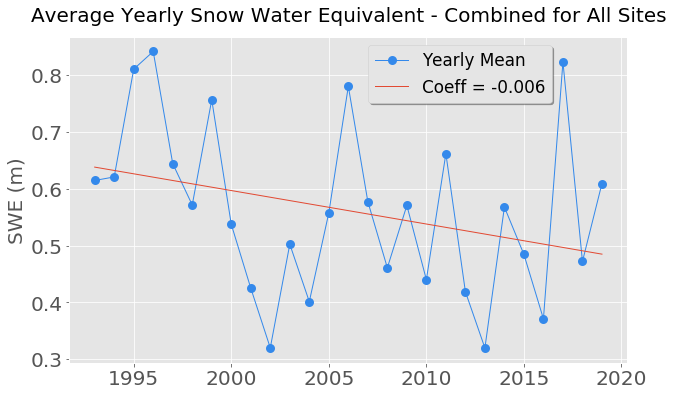

In [93]:
## ****************************************
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Average Yearly Snow Water Equivalent - Combined for All Sites', pad=15, fontsize=20)
ax.set_ylabel('SWE (m)', fontsize=20)

x = np.arange(1993, 2021, 1)
x_all_lin = np.arange(1993, 2020, 1)
y = [v for v in all_means.values()]
ax.plot(x, y, c= '#3489eb',marker='o', mew=3, linewidth=1, label='Yearly Mean')
ax.plot(x_all_lin, intercept + slope*x_all_lin, color='#E24A33', linewidth=1, label='Coeff = {}'.format(c1))
# ax.set_xticks(np.arange(1992, 2020, 5))
# ax.set_xticklabels(np.arange(1992, 2020, 5),fontsize=12)
ax.tick_params(labelsize='x-large')
ax.legend(loc='upper center', fancybox=True, shadow=True, fontsize='large', bbox_to_anchor=(.7, 1))
plt.savefig('corrected_linreg_allsites.png', dpi=80)


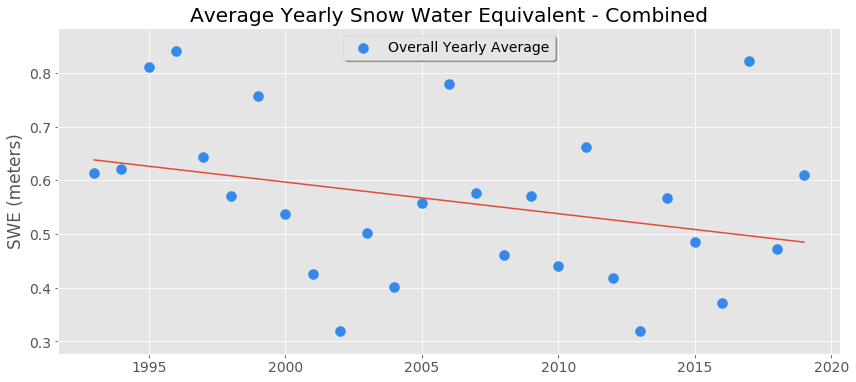

In [34]:
## ****************************************
fig, ax = plt.subplots(figsize=(14,6))
ax.set_title('Average Yearly Snow Water Equivalent - Combined')
ax.set_ylabel('SWE (meters)')

x = np.arange(1993, 2021, 1)
y = [v for v in all_means.values()]
ax.scatter(x, y, c= '#3489eb', label='Overall Yearly Average', s=100)
ax.plot(x_all_lin, intercept + slope*x_all_lin, color='#E24A33')
ax.legend(loc='upper center', fancybox=True, shadow=True)
plt.show()

Text(0, 0.5, 'meters')

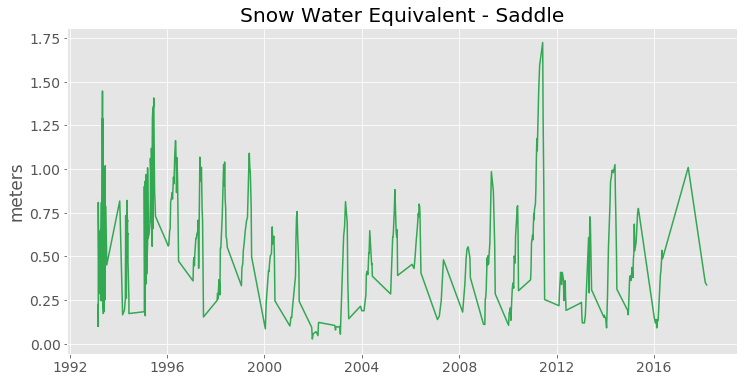

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(1993, 2021, 1)
# y = [v for v in saddle_dict.values()]
# ax.plot(x, y , 'ro')
sad_x = saddle.df['date']
sad_y = saddle.df['swe']
ax.plot(sad_x, sad_y, c='#32a852')
ax.set_title('Snow Water Equivalent - Saddle')
ax.set_ylabel('meters')

In [36]:
names

['saddle',
 'gl4',
 'gl5',
 'navajo',
 'martinelli',
 'arikaree',
 'subnivean',
 'albion',
 'gl3',
 'tower_meadow',
 'tower_tree_well',
 'c1',
 'soddie']

In [37]:
objects = [saddle, gl4, gl5, navajo, martinelli, arikaree, subnivean, albion, gl3, 
           tower_meadow, tower_tree_hill, c1, soddie]
uppercase_names = list(df_swe['local_site'].unique())
uppercase_names.pop(-1)
uppercase_names = [name.capitalize() for name in uppercase_names]
uppercase_names

['Saddle',
 'Gl4',
 'Gl5',
 'Navajo',
 'Martinelli',
 'Arikaree',
 'Subnivean',
 'Albion',
 'Gl3',
 'Tower meadow',
 'Tower tree well',
 'C1',
 'Soddie']

In [38]:
local_site_count_dct = {}
for i, obj in enumerate(objects):
    count = len(obj.local_site_names)
    local_site_count_dct[uppercase_names[i]] = count

In [39]:
sorted_dict = {k: v for k, v in sorted(local_site_count_dct.items(), key=lambda item: item[1])}

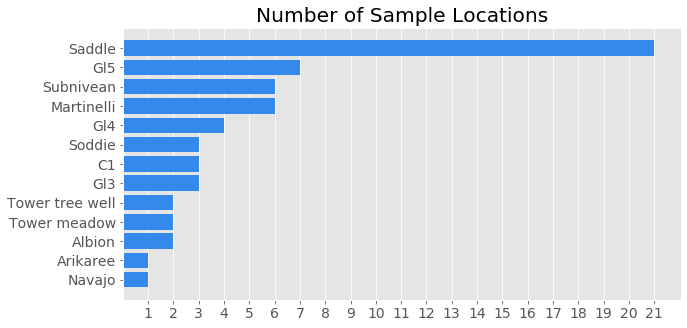

In [40]:
## ****************************************
fig, ax = plt.subplots(figsize=(10,5))
x = [k for k in sorted_dict.keys()]
y = [v for v in sorted_dict.values()]
ax.barh(x, y, color='#3489eb')
ax.yaxis.grid(False)
ax.set_xticks(np.arange(1,22,1))
ax.set_title('Number of Sample Locations')
plt.show()

In [41]:
saddle.df['samp_loc'].unique()

array(['SDL.008', 'SDL.028', 'SDL.058', 'SDL.007', 'SDL.035', 'SDL.016',
       'SDL.037', 'SDL.027', 'SDL.018', 'SDL.026', 'SDL.036', 'SDL.46',
       'SDL.N15', 'SDL.014', 'SDL.N15.THERMISTOR3E', 'SDL.005',
       'SDL.N15.NO3', 'SDL.N15.NCO', 'SDL.N15.NH4', 'SDL.006', 'SDL.013'],
      dtype=object)

In [42]:
df_swe.head()

,LTER_site,local_site,samp_loc,loc_code,date,prof_depth,mass,wted_temp,density,swe
0,NWT,SADDLE,SDL.008,008,1993-02-26,0.73,223.81,-8.356164,306.589041,0.22381
1,NWT,SADDLE,SDL.028,028,1993-02-26,0.38,100.84,-7.684211,265.368421,0.10084
2,NWT,SADDLE,SDL.058,058,1993-02-26,0.59,181.06,-7.305085,306.881356,0.18106
3,NWT,SADDLE,SDL.007,007,1993-03-04,0.49,182.04,-5.489796,371.510204,0.18204
4,NWT,SADDLE,SDL.028,028,1993-03-04,0.30,101.70,-6.333333,339.000000,0.10170


In [43]:
def get_yearly_totals(sample_object):
    dct = {}
    years = np.arange(1993, 2021, 1)
    for i in years:
        vals = []
        for j in range(0, len(sample_object.df['date'])):
            if sample_object.df['date'][j].year == i:
                vals.append(sample_object.df['swe'][j])
            dct[str(i)] = np.sum(vals)
    return dct
## not really useful cause snow may not have totally melted

In [44]:
saddle.df['date'][2].month

2

In [45]:
def get_monthly_means(sample_object):
    dct = {}
#     years = np.arange(1993, 2021, 1)
    months = np.arange(1, 13, 1)
    for mn in months:
        vals = []
        for j in range(0, len(sample_object.df['date'])):
            if sample_object.df['date'][j].month == mn:
                vals.append(sample_object.df['swe'][j])
            dct[str(mn)] = np.mean(vals)
    return dct

In [46]:
saddle_monthly = get_monthly_means(saddle)
gl4_monthly = get_monthly_means(gl4)
gl5_monthly = get_monthly_means(gl5)
navajo_monthly = get_monthly_means(navajo)
martinelli_monthly = get_monthly_means(martinelli)
arikaree_monthly = get_monthly_means(arikaree)
subnivean_monthly = get_monthly_means(subnivean)
albion_monthly = get_monthly_means(albion)
gl3_monthly = get_monthly_means(gl3)
tower_meadow_monthly = get_monthly_means(tower_meadow)
tower_tree_hill_monthly = get_monthly_means(tower_tree_hill)
c1_monthly = get_monthly_means(c1)
soddie_monthly = get_monthly_means(soddie)

In [47]:
arikaree_monthly

{'1': nan,
 '2': nan,
 '3': nan,
 '4': 0.8324,
 '5': 0.7655699851190477,
 '6': 0.7316754761904762,
 '7': 0.831068095238095,
 '8': nan,
 '9': nan,
 '10': nan,
 '11': nan,
 '12': nan}

In [48]:
arikaree.df

,LTER_site,local_site,samp_loc,loc_code,date,prof_depth,mass,wted_temp,density,swe
0,NWT,ARIKAREE,ARK,ark,1994-05-12,1.80,814.600000,0.000000,452.555556,0.814600
1,NWT,ARIKAREE,ARK,ark,1994-05-19,1.80,855.200000,0.000000,475.111111,0.855200
2,NWT,ARIKAREE,ARK,ark,1994-05-26,1.80,839.400000,0.000000,466.333333,0.839400
3,NWT,ARIKAREE,ARK,ark,1994-06-02,1.47,728.040000,0.000000,495.265306,0.728040
4,NWT,ARIKAREE,ARK,ark,1994-06-09,1.23,603.930000,-0.121951,491.000000,0.603930
5,NWT,ARIKAREE,ARK,ark,1994-06-16,1.40,694.600000,0.000000,496.142857,0.694600
6,NWT,ARIKAREE,ARK,ark,1994-06-23,1.00,496.400000,0.000000,496.400000,0.496400
7,NWT,ARIKAREE,ARK,ark,1994-06-30,1.05,517.958333,0.000000,493.293651,0.517958
8,NWT,ARIKAREE,ARK,ark,1995-06-22,2.30,1184.900000,0.000000,515.173913,1.184900
9,NWT,ARIKAREE,ARK,ark,1995-07-06,1.98,970.540000,0.000000,490.171717,0.970540


In [49]:
saddle_monthly
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
month_dicts = [saddle_monthly, gl4_monthly, gl5_monthly, navajo_monthly, martinelli_monthly, arikaree_monthly,
                 subnivean_monthly, albion_monthly, gl3_monthly, tower_meadow_monthly, tower_tree_hill_monthly,
                 c1_monthly, soddie_monthly]

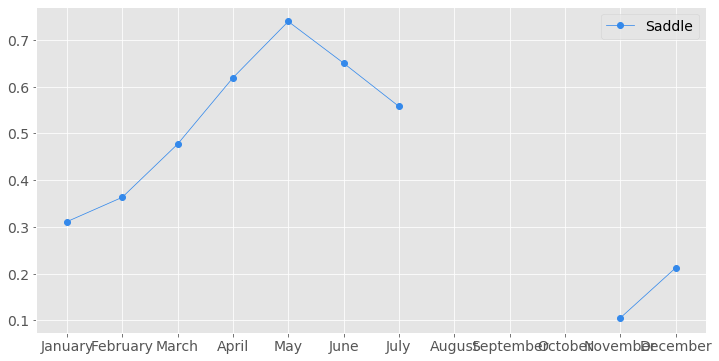

In [50]:
fig, ax = plt.subplots(figsize=(12,6))
x = [k for k in saddle_monthly.keys()]
months
y = [v for v in saddle_monthly.values()]
ax.plot(months, y, c= '#3489eb',marker='o', mew=1, linewidth=.75, label='Saddle')
ax.legend()
plt.show()

In [51]:
## ****************************************
def plot_monthly_mean_swe(month_mean_dicts):
    labels = ['Saddle','GL4','GL5','Navajo','Martinelli','Arikaree','Subnivean','Albion','GL3','Tower Meadow',
    'Tower Tree Well','C1','Soddie']
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_title('Monthly Averages All Time')
    ax.set_ylabel('SWE (m)')
    x = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
    ax.set_xticklabels(x, rotation=45)
    ax.set_prop_cycle('color',['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8', '#92C5DE', '#80CDC1', '#5E3C99', '#E66101', '#F4A582', 'B8E186'])

    for i, dct in enumerate(month_mean_dicts):
        y = [v for v in dct.values()]
        ax.plot(x, y, marker='o', mew=1, linewidth=.75, label=str(labels[i]))
                
    ax.legend(labels, loc='upper right', bbox_to_anchor=(1.125,.8), ncol=2, fancybox=True, shadow=True)

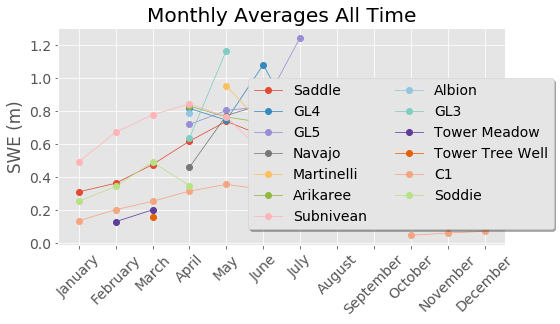

In [52]:
plot_monthly_mean_swe(month_dicts)

In [53]:
# PLOT 13 GRAPHS OF AVERAGES WITH LINEAR REGRESSION
list_of_dicts = [saddle_means, gl4_means, gl5_means, navajo_means, martinelli_means, arikaree_means,
                 subnivean_means, albion_means, gl3_means, tower_meadow_means, tower_tree_hill_means,
                 c1_means, soddie_means]

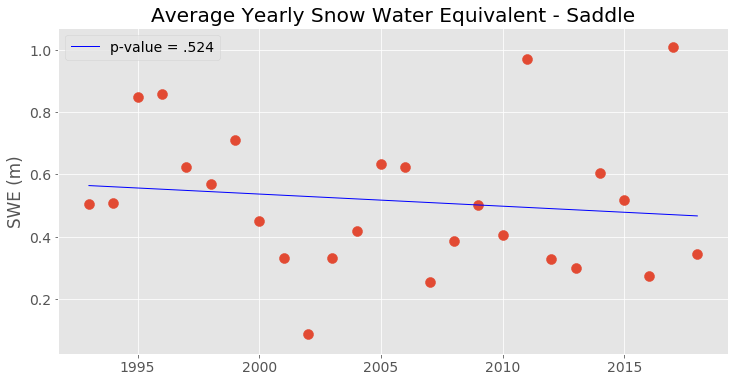

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(1993, 2021, 1)
y = [v for v in saddle_means.values()]

x_lin = np.arange(1993, 2019, 1)
y_lin = [v for v in saddle_means.values()]
y_lin.pop(-1)
y_lin.pop(-1)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_lin, y_lin)

ax.scatter(x, y,color= '#E24A33', s=100)
ax.plot(x_lin, intercept + slope*x_lin, c='blue',label='p-value = .524', linewidth=1)
ax.set_title('Average Yearly Snow Water Equivalent - Saddle')
ax.set_ylabel('SWE (m)')
ax.legend()
plt.show()
x_lin

IndexError: list index out of range

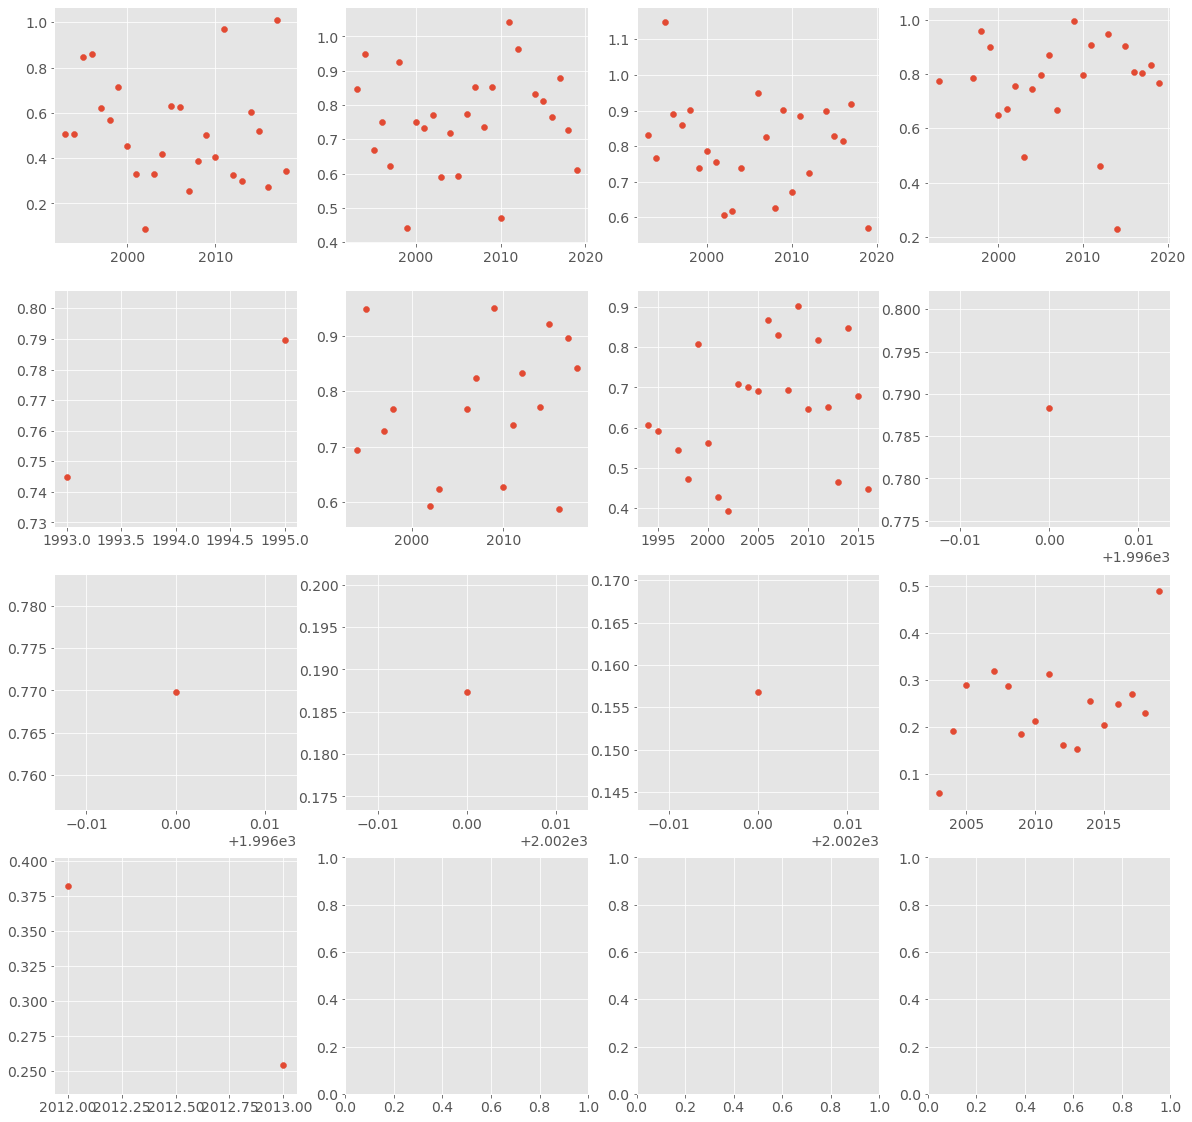

In [55]:
list_of_dicts = [saddle_means, gl4_means, gl5_means, navajo_means, martinelli_means, arikaree_means,
                 subnivean_means, albion_means, gl3_means, tower_meadow_means, tower_tree_hill_means,
                 c1_means, soddie_means]
fig, axs = plt.subplots(4,4,figsize=(20,20))
x = np.arange(1993, 2021, 1)
# y = [v for v in saddle_means.values()]
i=0
ax.set_prop_cycle('color',['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8', '#92C5DE', '#80CDC1', '#5E3C99', '#E66101', '#F4A582', 'B8E186'])
for ax in axs.flatten():
    y = [v for v in list_of_dicts[i].values()]
    i +=1
    ax.scatter(x, y)
# ax.plot(x, y , 'ro')
# axs.set_title('Average Yearly SWE - Saddle')
# axs.set_ylabel('Snow Water Equivalent (meters)')
# fig, ax_list = plt.subplots(2, 2)
# for ax in ax_list.flatten()

In [68]:
len(saddle.df)

412

In [69]:
names = list(df_swe['local_site'].unique())
names.pop(-1)
names = [x.lower().replace(' ', '_') for x in names]
names

objects = [saddle, gl4, gl5, navajo, martinelli, arikaree, subnivean, albion, gl3, 
           tower_meadow, tower_tree_hill, c1, soddie]

local_site_totals_dct = {}
for i, obj in enumerate(objects):
    count = len(obj.df)
    local_site_count_dct[uppercase_names[i]] = count
    
sorted_totals = {k: v for k, v in sorted(local_site_count_dct.items(), key=lambda item: item[1])}
local_site_count_dct

{'Saddle': 412,
 'Gl4': 58,
 'Gl5': 56,
 'Navajo': 26,
 'Martinelli': 12,
 'Arikaree': 26,
 'Subnivean': 329,
 'Albion': 2,
 'Gl3': 4,
 'Tower meadow': 5,
 'Tower tree well': 4,
 'C1': 243,
 'Soddie': 8}

Text(0.5, 0, 'Number of Samples')

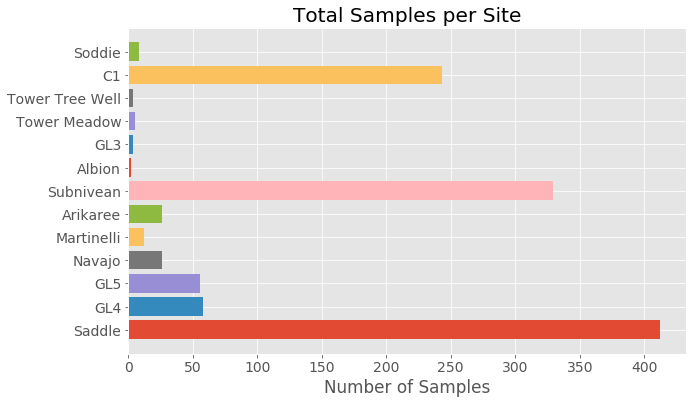

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
formal_names = ['Saddle','GL4','GL5','Navajo','Martinelli','Arikaree','Subnivean','Albion','GL3','Tower Meadow',
    'Tower Tree Well','C1','Soddie']
objects
for i, obj in enumerate(objects):
    y = len(obj.df)
    ax.barh(formal_names[i], y)
ax.set_title('Total Samples per Site')
ax.set_xlabel('Number of Samples')


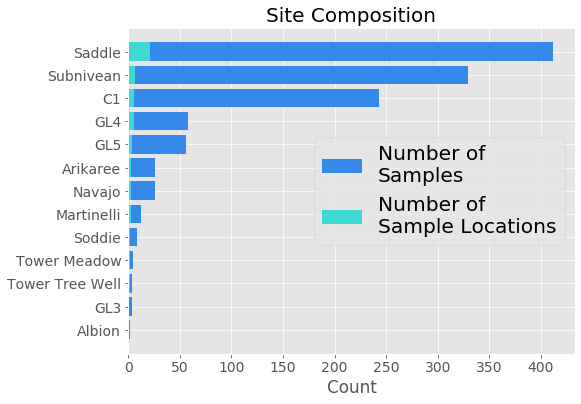

In [71]:
## ****************************************
fig, ax = plt.subplots(figsize=(8,6))
formal_names = ['Albion','GL3','Tower Tree Well','Tower Meadow','Soddie','Martinelli','Navajo','Arikaree','GL5','GL4',
    'C1','Subnivean','Saddle']
objects
x = [k for k in sorted_totals.keys()]
y = [v for v in sorted_totals.values()]
y_sample_sites = [v for v in sorted_dict.values()]
# ax.set_prop_cycle('color',['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8', '#92C5DE', '#80CDC1', '#5E3C99', '#E66101', '#F4A582', 'B8E186'])
# #3489eb
ax.barh(x, y, color='#3489eb', label='Number of \nSamples')
ax.barh(x, y_sample_sites, color='#3fd9d4', label='Number of \nSample Locations')

ax.set_title('Site Composition', fontsize=20)
ax.set_xlabel('Count')
ax.set_yticklabels(formal_names)
ax.legend(loc='center right', fontsize='x-large')
plt.show()

In [72]:
color_dict = {'Saddle':'#E24A33','GL4':'#348ABD','GL5':'#988ED5','Navajo':'#777777','Martinelli':'#FBC15E',
              'Arikaree':'#8EBA42','Subnivean':'#FFB5B8','Albion':'#92C5DE','GL3':'#80CDC1','Tower Meadow':'#5E3C99',
    'Tower Tree Well':'#E66101','C1':'#F4A582','Soddie':'#B8E186'}
color_dict

{'Saddle': '#E24A33',
 'GL4': '#348ABD',
 'GL5': '#988ED5',
 'Navajo': '#777777',
 'Martinelli': '#FBC15E',
 'Arikaree': '#8EBA42',
 'Subnivean': '#FFB5B8',
 'Albion': '#92C5DE',
 'GL3': '#80CDC1',
 'Tower Meadow': '#5E3C99',
 'Tower Tree Well': '#E66101',
 'C1': '#F4A582',
 'Soddie': '#B8E186'}

In [73]:
top_sites = [saddle_means, subnivean_means, c1_means, gl4_means, gl5_means,arikaree_means, navajo_means]
top_names = ['Saddle', 'Subnivean', 'C1', 'GL4', 'GL5', 'Arikaree', 'Navajo']
top_colors = [color_dict['Saddle'], color_dict['Subnivean'], color_dict['C1'], color_dict['GL4'],
              color_dict['GL5'], color_dict['Arikaree'],color_dict['Navajo']]
saddle_means

{'1993': 0.5059607131398013,
 '1994': 0.5088615000000001,
 '1995': 0.8488443443619873,
 '1996': 0.8594474166666666,
 '1997': 0.623349,
 '1998': 0.5703433333333332,
 '1999': 0.7123226666666667,
 '2000': 0.4515547058823529,
 '2001': 0.3315682906574395,
 '2002': 0.0856083909090909,
 '2003': 0.330712619047619,
 '2004': 0.4163552994227994,
 '2005': 0.6322878787878788,
 '2006': 0.6241209090909091,
 '2007': 0.25461,
 '2008': 0.3862375,
 '2009': 0.5031094610667111,
 '2010': 0.4061534375,
 '2011': 0.9710316294881589,
 '2012': 0.3271317699502877,
 '2013': 0.30011323263976714,
 '2014': 0.6030996153846153,
 '2015': 0.517969,
 '2016': 0.2731698611111111,
 '2017': 1.00946666666667,
 '2018': 0.34397133333333296,
 '2019': nan,
 '2020': nan}

In [141]:
## ****************************************************
def lin_regress(x, y):
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    results = model.fit()
#     params = results.params
    return results
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#     return slope, intercept, r_value, p_value, std_err
# x = np.array([k if ~np.isnan(v) for k, v in top_sites[0].items()])
# x = [x for x in countries if str(x) != 'nan']
CIs = []

In [147]:
x = []
for k, v in top_sites[5].items():
    if str(v) != 'nan':
        x.append(int(k))
    else:
        pass
y = np.array([v for v in top_sites[5].values()])
y = y[~np.isnan(y)]
x = np.array(x)

c = lin_regress(x,y)
CIs.append(c.conf_int()[1,:])
CIs

[array([-0.01636421,  0.00855156]),
 array([-0.00483534,  0.01598451]),
 array([-0.0020058 ,  0.01749147]),
 array([-0.00605399,  0.00924595]),
 array([-0.01066792,  0.00376088]),
 array([-0.00572874,  0.01071024])]

In [75]:
## ****************************************************
lin_regresses = [[-0.003906325102151978, 8.349419629869915, 0.5236700119739848], 
                 [0.005574586252507653, -10.526383881925533, 0.2772141025494249],
                [0.0077428338572561595, -15.331905622614242, 0.11056127771258156],
                [0.0015959806359015206, -2.444305311472887, 0.6706143053095486],
                [-0.0034535183543882397, 7.72724589938305, 0.3316218041756759],
                [0.0024907513944714384, -4.228435453992933, 0.5281068861253063],
                [-0.0009094397769027527, 2.586988247942623, 0.8616436667990759]]
lin_regresses[0][1]

8.349419629869915

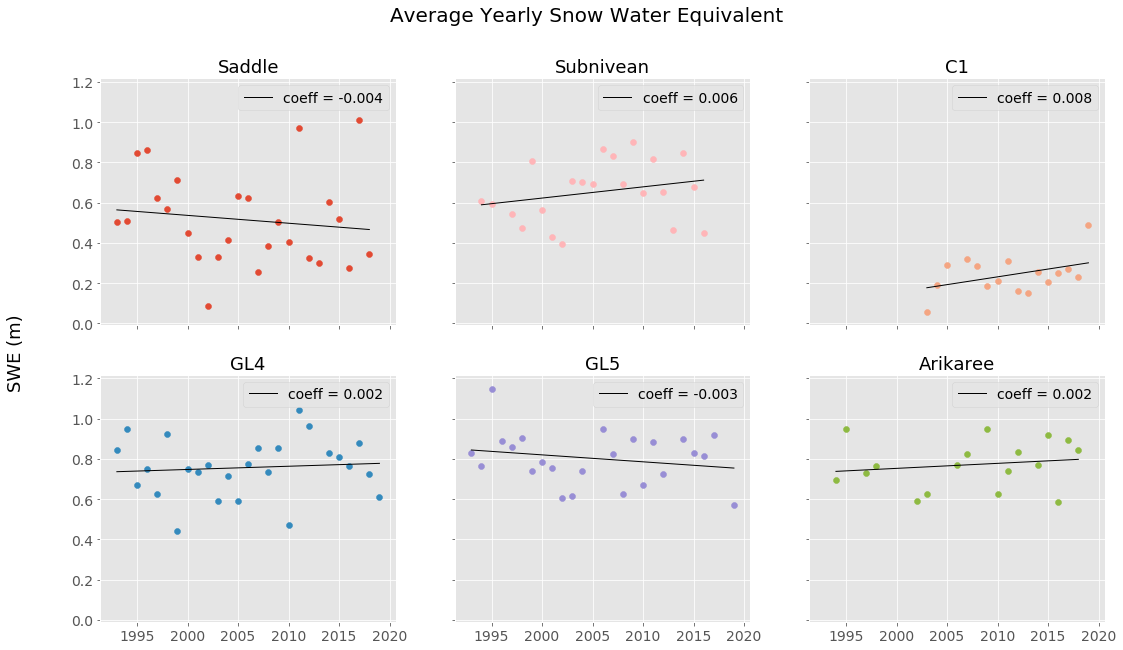

In [152]:
## ****************************************************
fig, axs = plt.subplots(2,3,figsize=(18, 10),sharey=True, sharex=True)
x = np.arange(1993, 2021, 1)
i = 0
fig.suptitle('Average Yearly Snow Water Equivalent', fontsize=20)

for ax in axs.flatten():
    y = [v for v in top_sites[i].values()]
    x_site = []
    for k, v in top_sites[i].items():
        if str(v) != 'nan':
            x_site.append(int(k))
        else:
            pass
    x_site=np.array(x_site)
    ax.scatter(x, y, color=top_colors[i])
    ax.plot(x_site, lin_regresses[i][1] + x_site*lin_regresses[i][0], c='black',label='coeff = {}'.format(str(round(lin_regresses[i][0],3))), linewidth=1)
    ax.set_title('{}'.format(top_names[i]), fontsize=18)
    ax.legend()
    i +=1

# ax.scatter(x, y,color= '#E24A33', s=100)
# ax.plot(x_lin, intercept + slope*x_lin, c='blue',label='p-value = .524', linewidth=1)
fig.text(0.06, 0.5, 'SWE (m)', ha='center', va='center', rotation='vertical', fontsize=18)
plt.savefig('corrected_linreg_top6.png', dpi=80)

In [77]:
local_site_count_dct

{'Saddle': 412,
 'Gl4': 58,
 'Gl5': 56,
 'Navajo': 26,
 'Martinelli': 12,
 'Arikaree': 26,
 'Subnivean': 329,
 'Albion': 2,
 'Gl3': 4,
 'Tower meadow': 5,
 'Tower tree well': 4,
 'C1': 243,
 'Soddie': 8}

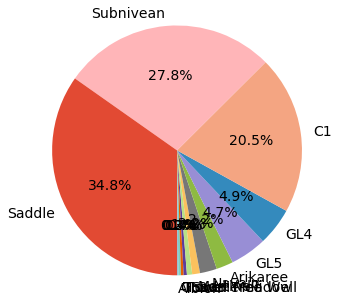

In [78]:
data = [v for v in sorted_totals.values()]
data_labels = ['Albion','GL3','Tower Tree Well','Tower Meadow','Soddie','Martinelli','Navajo','Arikaree','GL5','GL4',
    'C1','Subnivean','Saddle']
colrs = ['#92C5DE', '#80CDC1', '#E66101','#5E3C99', '#B8E186', '#FBC15E', '#777777', '#8EBA42', '#988ED5', '#348ABD', '#F4A582','#FFB5B8', '#E24A33']
# colrs = ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8', '#92C5DE', '#80CDC1', '#5E3C99', '#E66101', '#F4A582', '#B8E186']
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(data, labels=data_labels, colors = colrs, startangle=270, autopct='%1.1f%%')
ax.axis('equal')
plt.show()